In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
x = 5 * (np.random.rand(1000) - 0.5)
y = 5 * (np.random.rand(1000) - 0.5)
z = []
for i in range(1000):
    #if (x[i] < 0) & (y[i] < 0):
    #if (x[i] ** 2 + y[i] ** 2 < 5):    
    if (x[i] ** 2 + x[i] * y[i] + 0.5 * y[i] ** 2 < 1):
        z.append(0)
    else:
        z.append(1)

In [213]:
df = pd.DataFrame([x, y, z]).transpose()
df.columns = ['x', 'y', 'z']
df.head()

,x,y,z
0,-0.302023,-0.949989,0
1,0.002846,1.858353,1
2,1.396512,-1.351423,0
3,0.062259,2.257223,1
4,-1.304918,-0.790408,1


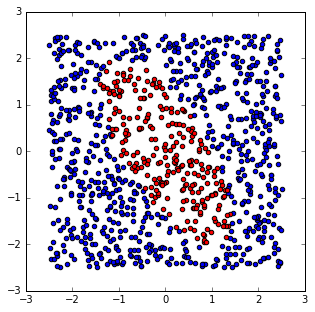

In [215]:
plt.figure(figsize=(5, 5))
plt.scatter(df[df.z == 1].x, df[df.z == 1].y, c='b')
plt.scatter(df[df.z == 0].x, df[df.z == 0].y, c='r')

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

In [217]:
ns = np.arange(10, 100, 10)
ds = np.arange(5, 20, 5)
est = []
nmax, dmax = 0, 0
m = 0
for n in ns:
    print(n)
    for d in ds:
        clf = RandomForestClassifier(n_estimators=n, max_depth=d)
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(df[['x', 'y']], df.z, test_size=0.4)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        #print(n, d, score)
        #est.append(clf.score(X_test, y_test))
        #if n % 10 == 0: print(n)
        if score > m:
            nmax, dmax, m = n, d, score
    
#plt.plot(ns, est)
print(nmax, dmax, m)

10
20
30
40
50
60
70
80
90
70 10 0.9825


In [218]:
clf = RandomForestClassifier(n_estimators=nmax, max_depth=dmax)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df[['x', 'y']], df.z, test_size=0.25)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.98399999999999999

In [219]:
exam_n = 100
x_exam = 5 * (np.random.rand(exam_n) - 0.5)
y_exam = 5 * (np.random.rand(exam_n) - 0.5)
exam = pd.DataFrame(np.vstack([x_exam, y_exam])).transpose()
exam.head()

,0,1
0,1.126009,-1.094910
1,-2.168932,0.390147
2,-1.556075,-1.296420
3,0.877466,-1.258056
4,-0.395724,-1.548676


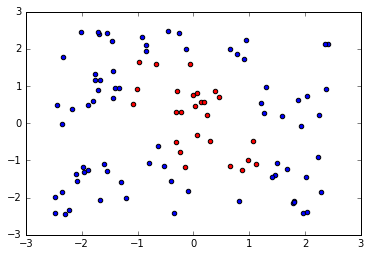

In [220]:
exam.columns = ['x', 'y']
exam['res'] = clf.predict(exam)
plt.scatter(exam[exam.res == 1].x, exam[exam.res == 1].y, c='b')
plt.scatter(exam[exam.res == 0].x, exam[exam.res == 0].y, c='r')

In [221]:
cm = plt.cm.RdBu
#plt.contourf(exam.x, exam.y, exam.res, cmap=cm, alpha=.8)
x_min, y_min = -3, -3
x_max, y_max = 3, 3
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [222]:
x_exam, y_exam = xx.ravel(), yy.ravel()
exam = pd.DataFrame(np.vstack([x_exam, y_exam])).transpose()
exam.columns = ['x', 'y']
exam['res'] = clf.predict_proba(exam)[:, 1:]
exam.head()

,x,y,res
0,-3.00,-3,1
1,-2.99,-3,1
2,-2.98,-3,1
3,-2.97,-3,1
4,-2.96,-3,1


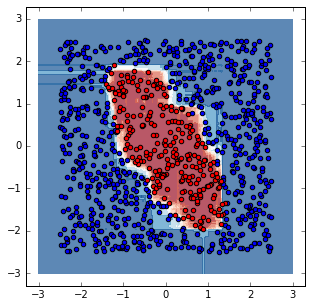

In [223]:
plt.figure(figsize=(5, 5))
Z = exam.res.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.7)
plt.scatter(df[df.z == 1].x, df[df.z == 1].y, c='b')
plt.scatter(df[df.z == 0].x, df[df.z == 0].y, c='r')